In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 1. Caricamento
raw_data = fetch_california_housing()
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df['MedHouseVal'] = raw_data.target  # Aggiungiamo il target per completezza

# 2. Analisi Statistica Descrittiva
print("--- DESCRIZIONE STATISTICA ---")
print(df.describe()) # Trasposto per leggere meglio le feature sulle righe

--- DESCRIZIONE STATISTICA ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
m

Cosa guardare nell'output di describe():

Count: Se il count non è uguale per tutte le colonne, hai dati mancanti.

Mean vs 50% (Mediana): Se la Media è molto più alta della Mediana, la distribuzione è asimmetrica (coda a destra) e probabilmente ci sono outlier alti.

Min/Max: Hanno senso?

Check: AveRooms ha un max di circa 141 stanze? Potrebbe essere un errore o un dormitorio/hotel.


--- CONTEGGIO VALORI NULLI ---
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


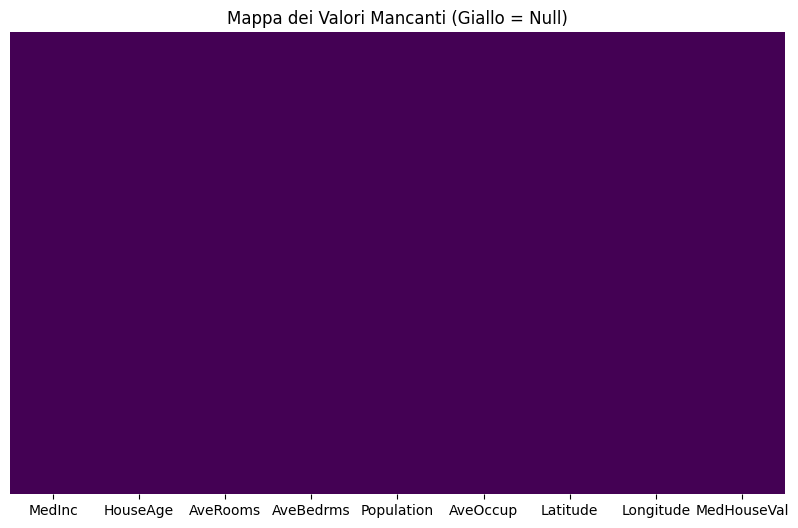

In [3]:
# Contare i nulli per ogni colonna
print("\n--- CONTEGGIO VALORI NULLI ---")
null_counts = df.isnull().sum()
print(null_counts)

# Visualizzazione grafica dei dati mancanti (utile se il dataset è grande)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mappa dei Valori Mancanti (Giallo = Null)')
plt.show()

In [4]:
# --- CREAZIONE ARTIFICIALE DI DATI MANCANTI PER ESERCIZIO ---
df_dirty = df.copy()

# Introduco il 5% di null su 'TotalBedrooms' (Simulo un dato a volte non dichiarato)
df_dirty.loc[df_dirty.sample(frac=0.05).index, 'AveBedrms'] = np.nan

# Introduco 12 valori nulli su 'MedInc' (Simulo un errore di registrazione raro)
df_dirty.loc[df_dirty.sample(n=12).index, 'MedInc'] = np.nan

print("\n--- NUOVO CONTEGGIO NULLI (SIMULATO) ---")
print(df_dirty.isnull().sum())


--- NUOVO CONTEGGIO NULLI (SIMULATO) ---
MedInc           12
HouseAge          0
AveRooms          0
AveBedrms      1032
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64


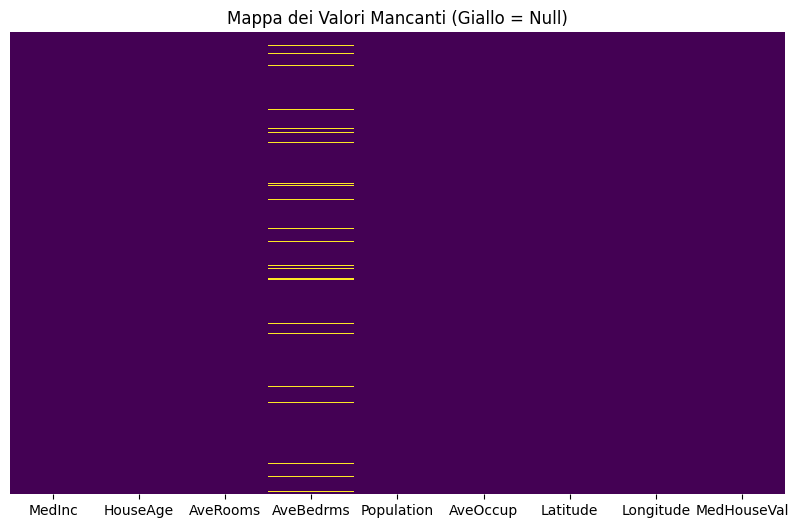

In [5]:
# Visualizzazione grafica dei dati mancanti (utile se il dataset è grande)
plt.figure(figsize=(10, 6))
sns.heatmap(df_dirty.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mappa dei Valori Mancanti (Giallo = Null)')
plt.show()

In [6]:
# Elimino le righe dove 'MedInc' è nullo
rows_before = df_dirty.shape[0]
df_clean_step1 = df_dirty.dropna(subset=['MedInc'])
rows_after = df_clean_step1.shape[0]

print(f"\nEliminazione righe per MedInc: Perse {rows_before - rows_after} righe.")


Eliminazione righe per MedInc: Perse 12 righe.


In [7]:
# Calcolo la mediana (escludendo i NaN automaticamente)
median_bedrms = df_clean_step1['AveBedrms'].median()

# Sostituisco i NaN con la mediana
df_final = df_clean_step1.copy()
df_final['AveBedrms'] = df_final['AveBedrms'].fillna(median_bedrms)

print(f"Valori nulli in AveBedrms sostituiti con la mediana: {median_bedrms:.2f}")

# Verifica finale
print("\n--- VERIFICA FINALE NULLI ---")
print(df_final.isnull().sum())

Valori nulli in AveBedrms sostituiti con la mediana: 1.05

--- VERIFICA FINALE NULLI ---
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Per AveBedrms (stanze da letto medie) abbiamo simulato il 5% di nulli.

Media: Usala se la distribuzione è normale (simmetrica).

Mediana: Usala se ci sono outlier (asimmetrica), perché la media verrebbe sballata dai valori estremi.

Guardando il describe() fatto all'inizio, AveBedrms ha outlier (Max molto alto). Meglio la Mediana.

Pochi nulli (< 2%)	Elimina le righe	df.dropna(subset=['col'])
Colonna quasi vuota (> 50% nulli)	Elimina la colonna	df.drop('col', axis=1)
Molti nulli ma colonna importante	Sostituisci (Imputazione)	df.fillna(valore)
Dati con Outlier	Sostituisci con Mediana	df['col'].median()
Dati Normali	Sostituisci con Media	df['col'].mean()

Generazione del grafico in corso...


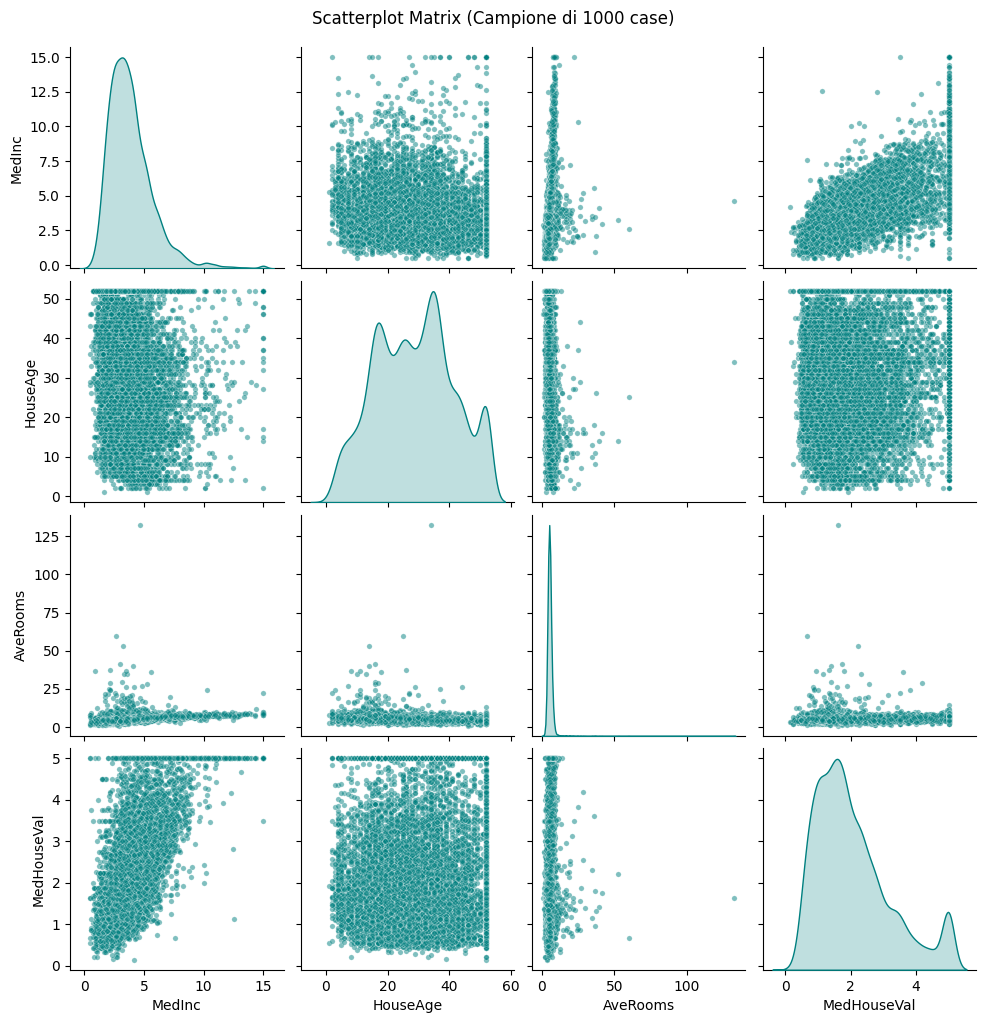

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Selezione delle Feature più interessanti
# Escludiamo Lat/Lon (che vanno mappate, non scatterate) e variabili ridondanti
cols_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']

# 2. Campionamento dei dati
# Prendiamo un campione di 1000 righe casuali per evitare un "muro di inchiostro"
df_sample = df[cols_to_plot].sample(n=10000, random_state=42)

# 3. Creazione del Pairplot
# kind='scatter': usa i punti per le relazioni
# diag_kind='kde': usa le curve di densità sulla diagonale (invece degli istogrammi)
# plot_kws={'alpha': 0.5}: rende i punti semi-trasparenti per vedere le sovrapposizioni
print("Generazione del grafico in corso...")
g = sns.pairplot(df_sample, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.fig.suptitle('Scatterplot Matrix (Campione di 1000 case)', y=1.02)
plt.show()

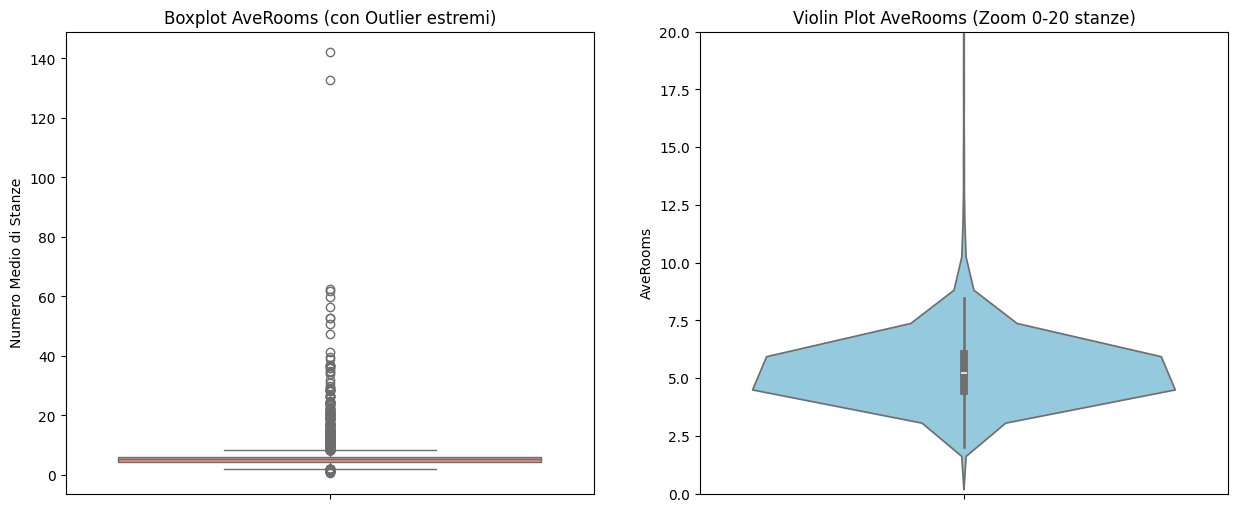

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creiamo una figura con due sotto-grafici
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Boxplot Classico (Verticale)
# Nota: "AveRooms" ha outlier così estremi che il box sarà schiacciato
sns.boxplot(y=df['AveRooms'], ax=axes[0], color='salmon')
axes[0].set_title('Boxplot AveRooms (con Outlier estremi)')
axes[0].set_ylabel('Numero Medio di Stanze')

# 2. Violin Plot (Mostra anche la densità)
# Limitiamo l'asse Y per vedere meglio la distribuzione "normale" ignorando gli estremi visivamente
sns.violinplot(y=df['AveRooms'], ax=axes[1], color='skyblue')
axes[1].set_ylim(0, 20)  # <--- ZOOM sulla parte centrale dei dati
axes[1].set_title('Violin Plot AveRooms (Zoom 0-20 stanze)')

plt.show()

Tecnica Statistica Robusta: L'IQR (Interquartile Range)Questa è la tecnica matematica che sta dietro al Boxplot. Non si basa sulla media (che è influenzabile dagli outlier), ma sui quartili (ordinamento dei dati).Definizione di Outlier secondo IQR:$$IQR = Q3 - Q1$$$$Limite\_Inferiore = Q1 - 1.5 \times IQR$$$$Limite\_Superiore = Q3 + 1.5 \times IQR$$

In [10]:
# 1. Calcolo dei Quartili
Q1 = df['AveRooms'].quantile(0.25)
Q3 = df['AveRooms'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definizione dei limiti
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

print(f"Intervallo 'Normale' per stanze: da {lower_bound:.2f} a {upper_bound:.2f}")

# 3. Individuazione degli Outlier
outliers_iqr = df[(df['AveRooms'] < lower_bound) | (df['AveRooms'] > upper_bound)]
print(f"Numero di Outlier rilevati con IQR: {len(outliers_iqr)}")
print(f"Percentuale sul totale: {len(outliers_iqr)/len(df)*100:.2f}%")

# Vediamo alcuni di questi outlier estremi
print("\nEsempi di outlier estremi:")
print(outliers_iqr['AveRooms'].sort_values(ascending=False).head(5))

Intervallo 'Normale' per stanze: da 2.02 a 8.47
Numero di Outlier rilevati con IQR: 511
Percentuale sul totale: 2.48%

Esempi di outlier estremi:
1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: AveRooms, dtype: float64


Tecnica Statistica Parametrica: Z-ScoreQuesta tecnica assume che i dati seguano una distribuzione Normale (a campana). Calcola di quante "Deviazioni Standard" un valore si discosta dalla media.Soglia tipica: Se $Z > 3$ o $Z < -3$, è un outlier.

Numero di Outlier rilevati con Z-Score > 3: 133


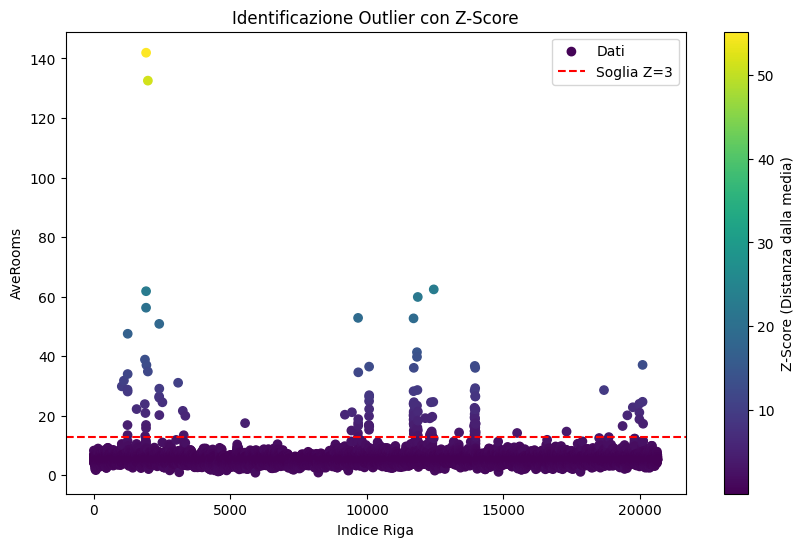

In [11]:
from scipy import stats
import numpy as np

# Calcolo Z-score per la colonna AveRooms
# z = (x - mean) / std
df['z_score_rooms'] = np.abs(stats.zscore(df['AveRooms']))

# Filtro chi ha un Z-score maggiore di 3
outliers_z = df[df['z_score_rooms'] > 3]

print(f"Numero di Outlier rilevati con Z-Score > 3: {len(outliers_z)}")

# Scatterplot per visualizzare Z-Score vs Valore
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['AveRooms'], c=df['z_score_rooms'], cmap='viridis', label='Dati')
plt.colorbar(label='Z-Score (Distanza dalla media)')
plt.axhline(y=df['AveRooms'].mean() + 3*df['AveRooms'].std(), color='r', linestyle='--', label='Soglia Z=3')
plt.title('Identificazione Outlier con Z-Score')
plt.xlabel('Indice Riga')
plt.ylabel('AveRooms')
plt.legend()
plt.show()

# Pulizia finale (Rimuoviamo colonna temporanea)
df.drop(columns=['z_score_rooms'], inplace=True)

Analisi Multivariata (Outlier Contestuali)
A volte un valore non è strano da solo, ma è strano in relazione a un altro. Esempio: Una casa che costa pochissimo (Low Price) in una zona ricchissima (High Income).

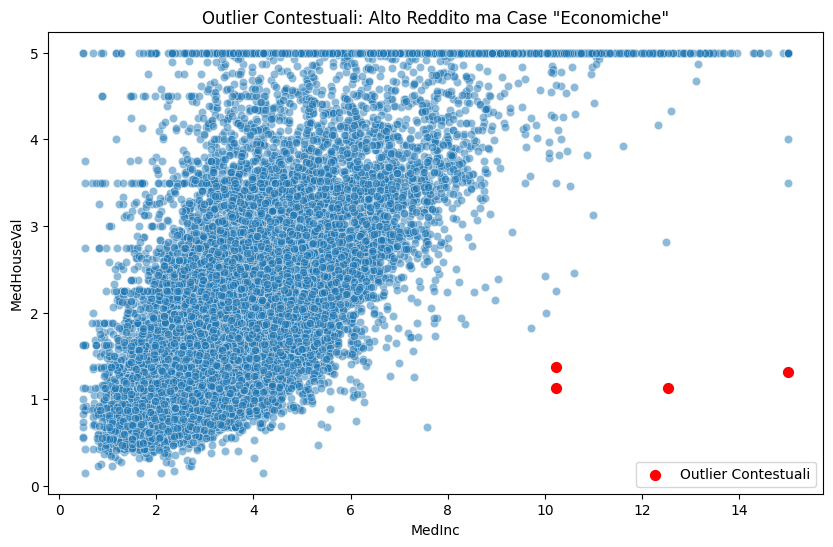

In [12]:
plt.figure(figsize=(10, 6))

# Scatterplot Reddito vs Prezzo
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)

# Evidenziamo un'area "sospetta": Alto Reddito ma Basso Valore Casa
# (Es. Reddito > 10 ma Valore Casa < 2)
filter_contextual = (df['MedInc'] > 10) & (df['MedHouseVal'] < 2)
plt.scatter(df[filter_contextual]['MedInc'], 
            df[filter_contextual]['MedHouseVal'], 
            color='red', s=50, label='Outlier Contestuali')

plt.title('Outlier Contestuali: Alto Reddito ma Case "Economiche"')
plt.legend()
plt.show()

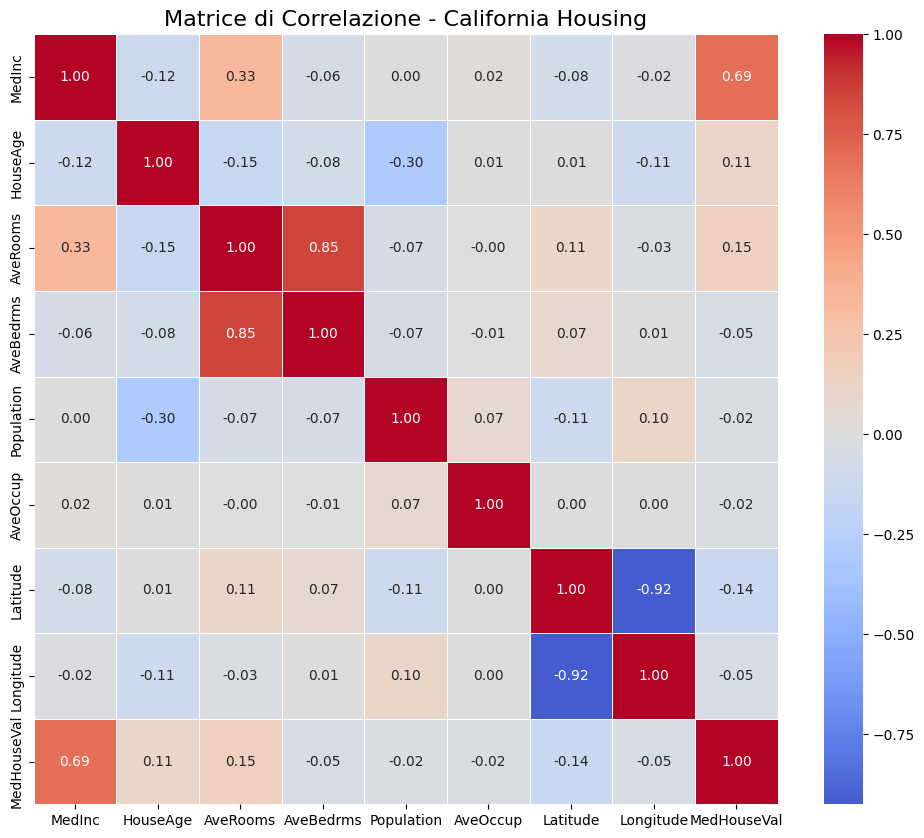

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = df.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

A. Cosa fa alzare il prezzo? (Correlazione con MedHouseVal)

MedInc (0.69): Correlazione Forte Positiva.

Significato: È il motore principale. Più alto è il reddito medio del quartiere, più alto è il valore della casa. Il coefficiente 0.69 è molto significativo in statistica sociale.

AveRooms (0.15): Correlazione Debole Positiva.

Significato: Case con più stanze valgono di più, ma la relazione è debole. Perché? Perché una casa con 8 stanze nel deserto vale meno di una con 3 stanze a San Francisco. La posizione conta più della grandezza.

Latitude (-0.14): Correlazione Debole Negativa.

Significato: Andando verso Nord (Latitudine sale), i prezzi tendono leggermente a scendere (rispetto alle costose aree di LA/San Diego a sud), ma la relazione non è lineare perché anche San Francisco è a nord ed è costosa.

Variabili Ridondanti (Multicollinearità)
Questo è cruciale per la selezione delle feature. Se due variabili sono troppo correlate tra loro, confondono i modelli (specialmente la Regressione Lineare).

AveRooms vs AveBedrms (0.85): Altissima Correlazione.

Problema: Se una casa ha più stanze in totale, avrà ovviamente anche più camere da letto.

Azione: In un modello di Machine Learning, spesso conviene tenerne solo una o creare una feature combinata (es. rapporto camere/stanze), altrimenti il modello "vede doppio".

Latitude vs Longitude (-0.92): Altissima Correlazione Negativa.

Motivo: È puramente geografico. La California ha una forma diagonale (da Nord-Ovest a Sud-Est). Se ti sposti a Est (Longitudine aumenta), ti sposti anche a Sud (Latitudine diminuisce) per restare nello stato.

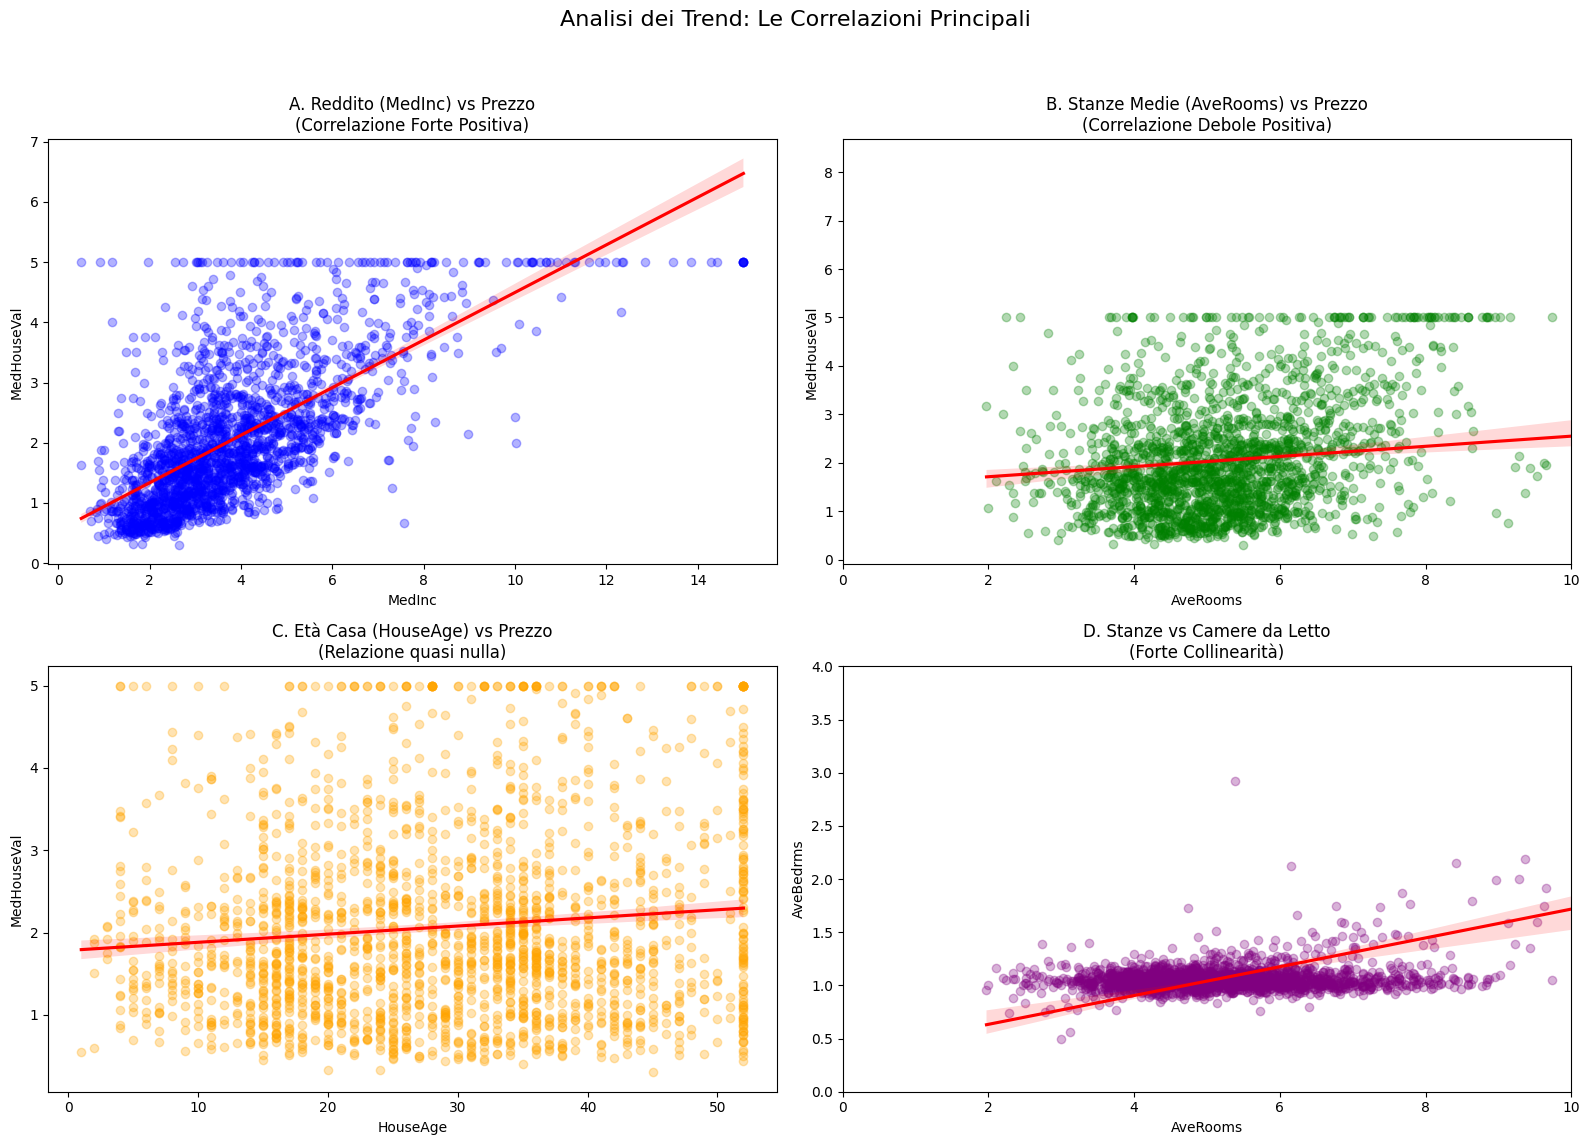

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Creiamo un campione rappresentativo (10% dei dati) per velocizzare e pulire i grafici
df_sample = df.sample(frac=0.1, random_state=42)

# 2. Impostiamo una griglia 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analisi dei Trend: Le Correlazioni Principali', fontsize=16)

# --- GRAFICO A: Il Driver Principale (Reddito vs Prezzo) ---
# È la correlazione più forte (0.69). Ci aspettiamo una linea netta verso l'alto.
sns.regplot(ax=axes[0, 0], x='MedInc', y='MedHouseVal', data=df_sample, 
            scatter_kws={'alpha':0.3, 'color':'blue'}, line_kws={'color':'red'})
axes[0, 0].set_title('A. Reddito (MedInc) vs Prezzo\n(Correlazione Forte Positiva)')

# --- GRAFICO B: La Struttura (Stanze vs Prezzo) ---
# Qui limitiamo l'asse X a 10 stanze per evitare che gli outlier schiaccino il grafico.
sns.regplot(ax=axes[0, 1], x='AveRooms', y='MedHouseVal', data=df_sample, 
            scatter_kws={'alpha':0.3, 'color':'green'}, line_kws={'color':'red'})
axes[0, 1].set_xlim(0, 10) # ZOOM sui dati normali
axes[0, 1].set_title('B. Stanze Medie (AveRooms) vs Prezzo\n(Correlazione Debole Positiva)')

# --- GRAFICO C: L'Età (Età Casa vs Prezzo) ---
# Vediamo se le case vecchie valgono di più o di meno.
sns.regplot(ax=axes[1, 0], x='HouseAge', y='MedHouseVal', data=df_sample, 
            scatter_kws={'alpha':0.3, 'color':'orange'}, line_kws={'color':'red'})
axes[1, 0].set_title('C. Età Casa (HouseAge) vs Prezzo\n(Relazione quasi nulla)')

# --- GRAFICO D: La Multicollinearità (Stanze vs Camere da Letto) ---
# Utile per capire se due variabili dicono la stessa cosa.
sns.regplot(ax=axes[1, 1], x='AveRooms', y='AveBedrms', data=df_sample, 
            scatter_kws={'alpha':0.3, 'color':'purple'}, line_kws={'color':'red'})
axes[1, 1].set_xlim(0, 10) 
axes[1, 1].set_ylim(0, 4)
axes[1, 1].set_title('D. Stanze vs Camere da Letto\n(Forte Collinearità)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

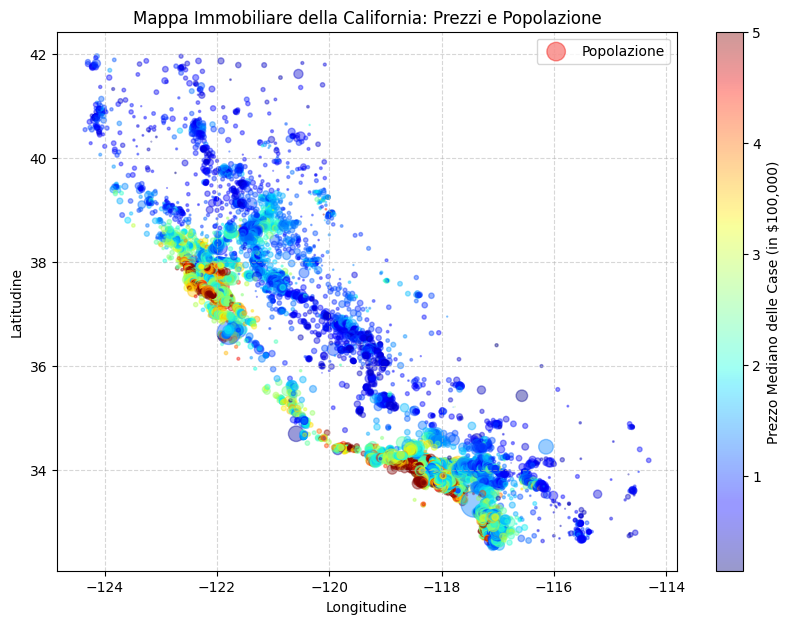

In [15]:
import matplotlib.pyplot as plt

# Impostiamo una figura abbastanza grande
plt.figure(figsize=(10, 7))

# Creiamo lo scatter plot
# alpha=0.4: La trasparenza è fondamentale per vedere dove i punti si sovrappongono (alta densità)
# c=...: Colora i punti in base al prezzo
# cmap='jet': Usa una scala colori ad alto contrasto (Blu=Freddo/Economico, Rosso=Caldo/Costoso)
# s=...: La dimensione dei pallini dipende dalla popolazione (diviso 100 per non fare pallini giganti)
mappa = plt.scatter(x=df['Longitude'], 
                    y=df['Latitude'], 
                    alpha=0.4, 
                    c=df['MedHouseVal'], 
                    cmap='jet', 
                    s=df['Population']/100, 
                    label='Popolazione')

# Aggiungiamo la barra laterale per capire i colori (Prezzi)
cbar = plt.colorbar(mappa)
cbar.set_label('Prezzo Mediano delle Case (in $100,000)')

# Etichette e Titolo
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.title('Mappa Immobiliare della California: Prezzi e Popolazione')
plt.legend()

# Trucco estetico: Aggiungiamo una griglia leggera
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

Bedroom_Ratio (Rapporto Camere/Stanze):

Formula: AveBedrms / AveRooms.

Ipotesi: Se una casa è fatta solo di camere da letto (rapporto alto), probabilmente è un dormitorio o un appartamento piccolo. Se il rapporto è basso, ci sono molti salotti/bagni/studi (casa di lusso). Ci aspettiamo una correlazione negativa col prezzo.

Rooms_per_Person (Stanze per Persona):

Formula: AveRooms / AveOccup.

Ipotesi: Più stanze ci sono per ogni abitante, più ricca è la famiglia. Ci aspettiamo una correlazione positiva.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lavoriamo su una copia per sicurezza
df_eng = df.copy()

# 1. Creazione Bedroom Ratio (Percentuale di camere da letto sul totale)
df_eng['Bedroom_Ratio'] = df_eng['AveBedrms'] / df_eng['AveRooms']

# 2. Creazione Rooms per Person (Spazio vitale pro capite)
df_eng['Rooms_per_Person'] = df_eng['AveRooms'] / df_eng['AveOccup']

# Diamo un'occhiata alle nuove colonne
print(df_eng[['Bedroom_Ratio', 'Rooms_per_Person', 'MedHouseVal']].head())

   Bedroom_Ratio  Rooms_per_Person  MedHouseVal
0       0.146591          2.732919        4.526
1       0.155797          2.956685        3.585
2       0.129516          2.957661        3.521
3       0.184458          2.283154        3.413
4       0.172096          2.879646        3.422


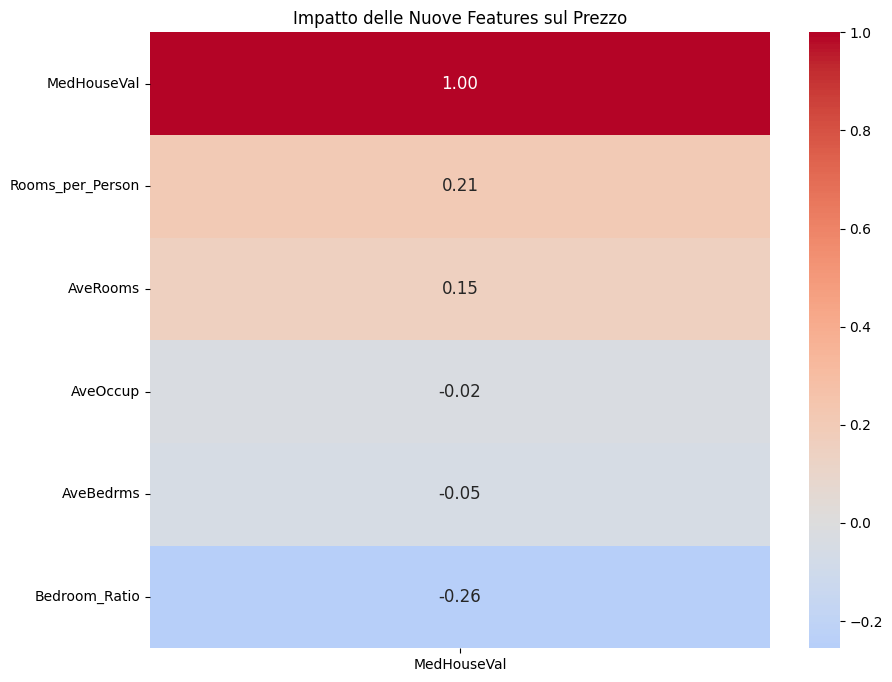

In [17]:
# Selezioniamo le colonne vecchie vs nuove per il confronto
cols_compare = ['MedHouseVal', 'AveRooms', 'AveBedrms', 'AveOccup', 'Bedroom_Ratio', 'Rooms_per_Person']

# Calcolo correlazione
corr_eng = df_eng[cols_compare].corr()

# Visualizzazione
plt.figure(figsize=(10, 8))
sns.heatmap(corr_eng[['MedHouseVal']].sort_values(by='MedHouseVal', ascending=False), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            annot_kws={"size": 12})
plt.title('Impatto delle Nuove Features sul Prezzo')
plt.show()

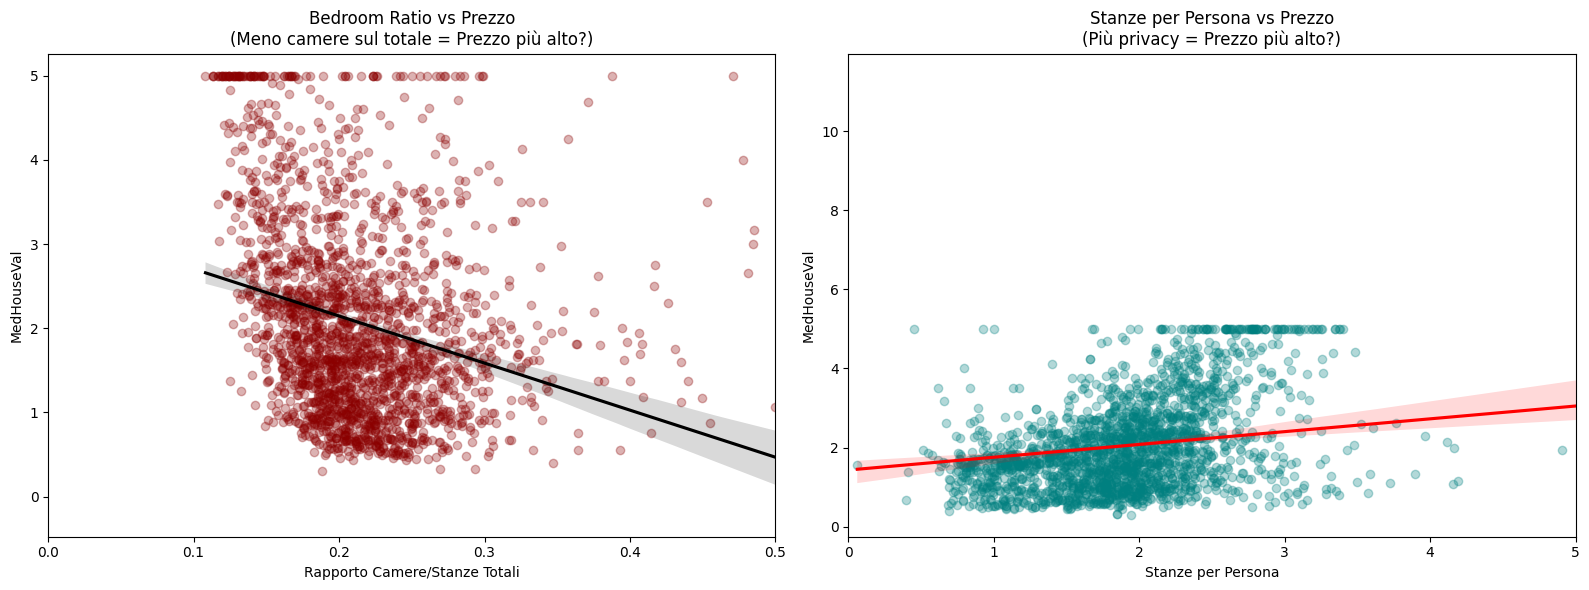

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Campionamento per velocità
df_sample = df_eng.sample(frac=0.1, random_state=42)

# --- GRAFICO 1: Bedroom Ratio vs Prezzo ---
sns.regplot(x='Bedroom_Ratio', y='MedHouseVal', data=df_sample, ax=axes[0],
            scatter_kws={'alpha':0.3, 'color':'darkred'}, line_kws={'color':'black'})

# Zoomiamo su valori sensati (es. tra 0 e 0.5, cioè fino al 50% di camere)
axes[0].set_xlim(0, 0.5)
axes[0].set_title('Bedroom Ratio vs Prezzo\n(Meno camere sul totale = Prezzo più alto?)')
axes[0].set_xlabel('Rapporto Camere/Stanze Totali')

# --- GRAFICO 2: Rooms per Person vs Prezzo ---
sns.regplot(x='Rooms_per_Person', y='MedHouseVal', data=df_sample, ax=axes[1],
            scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'red'})

# Zoomiamo su valori sensati (es. tra 0 e 5 stanze a testa)
axes[1].set_xlim(0, 5)
axes[1].set_title('Stanze per Persona vs Prezzo\n(Più privacy = Prezzo più alto?)')
axes[1].set_xlabel('Stanze per Persona')

plt.tight_layout()
plt.show()

Il reddito è un numero continuo (MedInc), ma nel mondo reale ragioniamo per "fasce". Creiamo delle categorie (Low, Medium, High) e vediamo come cambiano le case tra questi gruppi.

Domanda di Business: I ricchi comprano case più grandi o solo case meglio posizionate?

C:\Users\39327\AppData\Local\Temp\ipykernel_12632\3309503012.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = df.groupby('Income_Bin')[['MedHouseVal', 'AveRooms', 'HouseAge', 'Bedroom_Ratio']].mean()
C:\Users\39327\AppData\Local\Temp\ipykernel_12632\3309503012.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_analysis.index, y=income_analysis['MedHouseVal'], ax=axes[0], palette='viridis')
C:\Users\39327\AppData\Local\Temp\ipykernel_12632\3309503012.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

--- Profilo Medio per Fascia di Reddito ---
             MedHouseVal  AveRooms   HouseAge  Bedroom_Ratio
Income_Bin                                                  
Basso           1.229929  4.568227  30.969574       0.261360
Medio-Basso     1.718111  5.031106  29.383915       0.227417
Medio-Alto      2.158627  5.544516  28.368798       0.200180
Alto            3.167567  6.572150  25.835659       0.163342


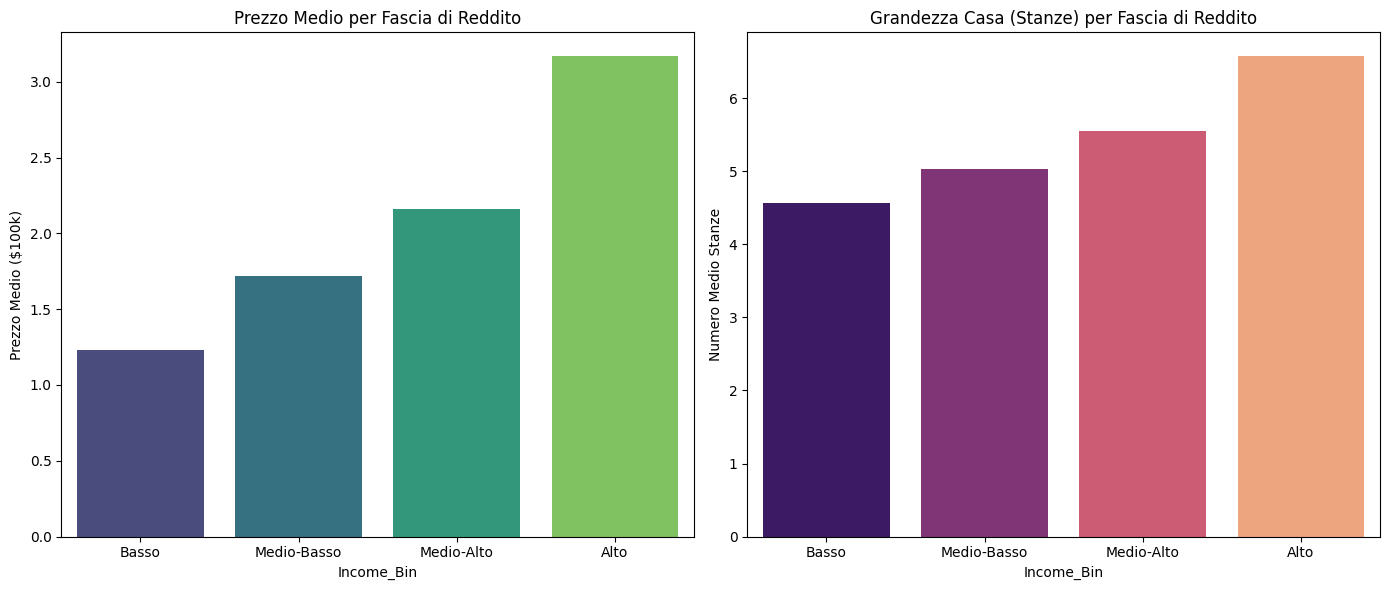

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=df_eng
# Creiamo 4 fasce di reddito basate sui quartili (quantili)
# qcut divide i dati in gruppi di uguale numerosità
df['Income_Bin'] = pd.qcut(df['MedInc'], q=4, labels=['Basso', 'Medio-Basso', 'Medio-Alto', 'Alto'])

# Raggruppiamo per fascia di reddito e calcoliamo le medie delle altre feature
income_analysis = df.groupby('Income_Bin')[['MedHouseVal', 'AveRooms', 'HouseAge', 'Bedroom_Ratio']].mean()

print("--- Profilo Medio per Fascia di Reddito ---")
print(income_analysis)

# Visualizziamo: Come cambia la grandezza della casa al crescere del reddito?
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico 1: Prezzo per fascia
sns.barplot(x=income_analysis.index, y=income_analysis['MedHouseVal'], ax=axes[0], palette='viridis')
axes[0].set_title('Prezzo Medio per Fascia di Reddito')
axes[0].set_ylabel('Prezzo Medio ($100k)')

# Grafico 2: Numero Stanze per fascia
sns.barplot(x=income_analysis.index, y=income_analysis['AveRooms'], ax=axes[1], palette='magma')
axes[1].set_title('Grandezza Casa (Stanze) per Fascia di Reddito')
axes[1].set_ylabel('Numero Medio Stanze')

plt.tight_layout()
plt.show()

mentre il Prezzo raddoppia o triplica tra "Basso" e "Alto", il numero di Stanze cresce molto meno (es. da 5 a 7). Conclusione: Il reddito alto paga principalmente la posizione (esclusività), non solo i metri quadri.

Le case sono state costruite in epoche diverse. Possiamo raggruppare l'età in decenni e vedere se c'è un trend "Vintage" o "Nuovo".

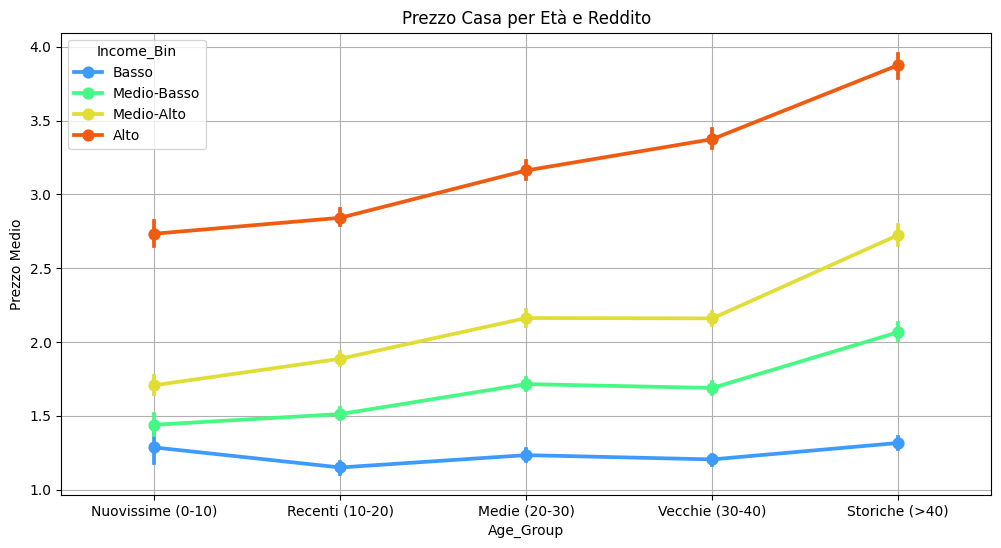

In [20]:
# Creiamo fasce di età (es. 0-10 anni, 10-20, etc.)
# Bins: 0, 10, 20, 30, 40, 52 (max dataset)
bins_age = [0, 10, 20, 30, 40, 60]
labels_age = ['Nuovissime (0-10)', 'Recenti (10-20)', 'Medie (20-30)', 'Vecchie (30-40)', 'Storiche (>40)']

df['Age_Group'] = pd.cut(df['HouseAge'], bins=bins_age, labels=labels_age)

plt.figure(figsize=(12, 6))
# Usiamo un pointplot per vedere il trend della media con intervalli di confidenza
sns.pointplot(x='Age_Group', y='MedHouseVal', data=df, hue='Income_Bin', palette='turbo')
plt.title('Prezzo Casa per Età e Reddito')
plt.ylabel('Prezzo Medio')
plt.grid(True)
plt.show()

La California corre da Nord-Ovest a Sud-Est.Possiamo creare un Indice Diagonale usando questa formula approssimativa:$$Indice = Longitude + (0.7 \times Latitude)$$Perché 0.7? È il coefficiente angolare approssimativo dell'asse della California. Aggiungendo una frazione della latitudine alla longitudine, "annulliamo" l'inclinazione dello stato.Valori Bassi: Corrisponderanno alla Costa (più a Ovest/Sud).Valori Medi: Corrisponderanno alla Central Valley.Valori Alti: Corrisponderanno al Confine Est (Sierra Nevada/Deserto).

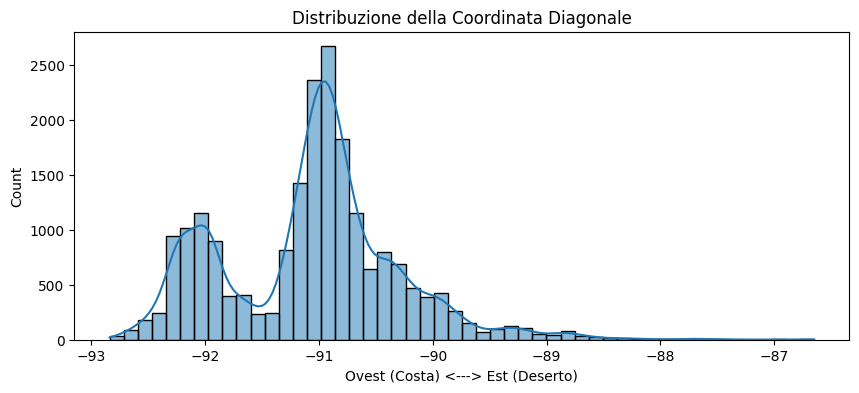

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Usiamo una copia del dataframe pulito (se disponibile) o originale
df_geo = df.copy()

# 1. Creazione della coordinata ruotata
# Il fattore 0.8 è empirico: allinea bene la costa da SF a LA
df_geo['Diagonal_Coord'] = df_geo['Longitude'] + 0.8 * df_geo['Latitude']

# 2. Definizione delle 3 Zone basata sui quantili (o tagli manuali)
# Usiamo qcut per dividere in 3 fasce di popolazione uguale, o tagli manuali per precisione geografica
# Qui usiamo tagli manuali guardando la distribuzione per separare meglio la geografia fisica
# Nota: I valori di taglio dipendono dalla formula sopra.
# Facciamo prima un istogramma per capire dove tagliare
plt.figure(figsize=(10, 4))
sns.histplot(df_geo['Diagonal_Coord'], bins=50, kde=True)
plt.title('Distribuzione della Coordinata Diagonale')
plt.xlabel('Ovest (Costa) <---> Est (Deserto)')
plt.show()

# Definiamo le etichette basandoci sulla distribuzione (adattiamo i numeri ai picchi)
# Valori tipici con fattore 0.8: < -91 (Costa), da -91 a -89 (Valle), > -89 (Est)
def definisci_zona(val):
    if val < -91.5:
        return '1. Costa'
    elif val < -89.5:
        return '2. Central Valley'
    else:
        return '3. Confine Est/Inland'

df_geo['Geo_Zone'] = df_geo['Diagonal_Coord'].apply(definisci_zona)

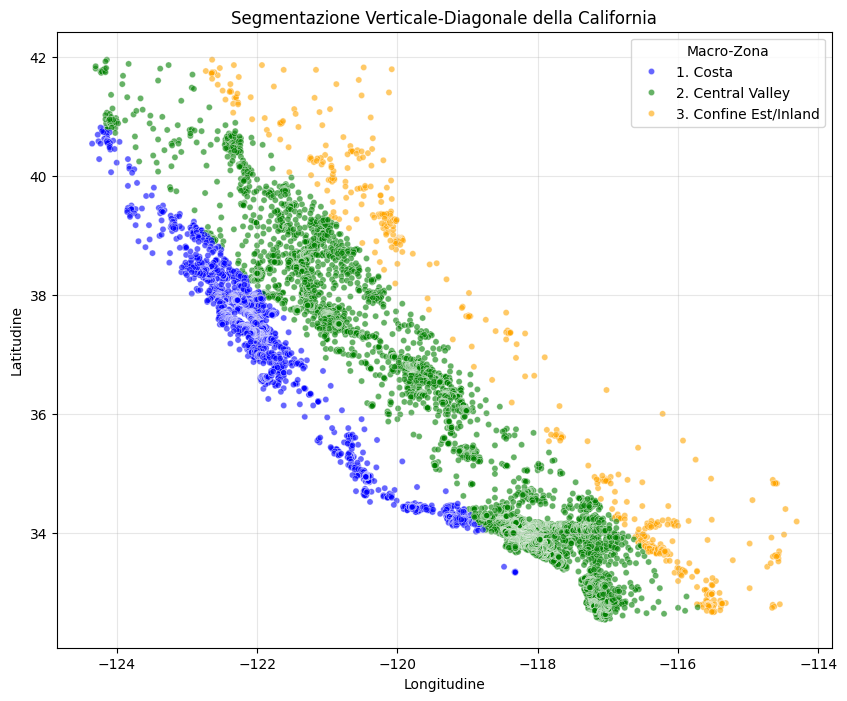

In [22]:
plt.figure(figsize=(10, 8))

# Scatterplot: Longitude vs Latitude, ma colorato per ZONA
sns.scatterplot(x='Longitude', y='Latitude', hue='Geo_Zone', 
                data=df_geo, palette={'1. Costa': 'blue', '2. Central Valley': 'green', '3. Confine Est/Inland': 'orange'},
                alpha=0.6, s=20)

plt.title('Segmentazione Verticale-Diagonale della California')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.legend(title='Macro-Zona')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\39327\AppData\Local\Temp\ipykernel_12632\3548194100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Geo_Zone', y='MedHouseVal', data=df_geo, palette='Set2')


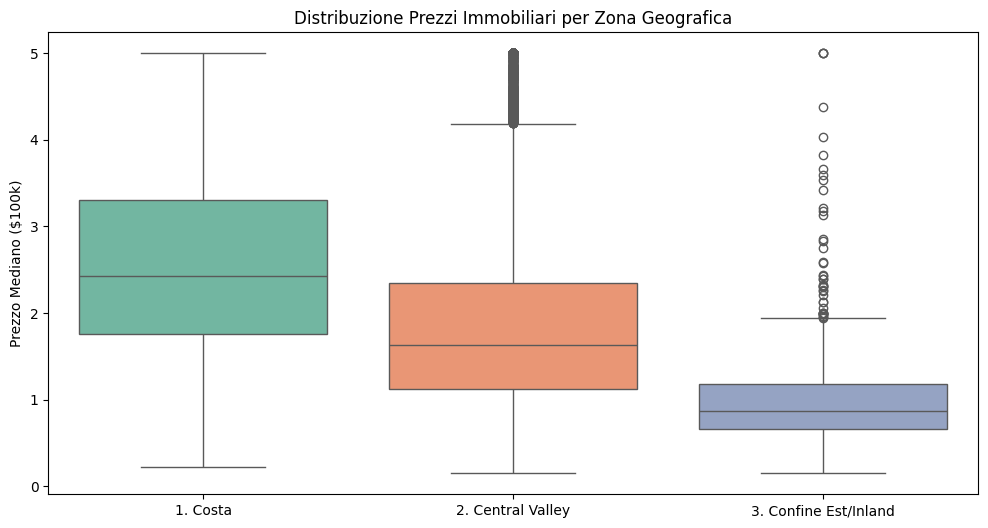

In [23]:
plt.figure(figsize=(12, 6))

# Boxplot Prezzi
sns.boxplot(x='Geo_Zone', y='MedHouseVal', data=df_geo, palette='Set2')
plt.title('Distribuzione Prezzi Immobiliari per Zona Geografica')
plt.ylabel('Prezzo Mediano ($100k)')
plt.xlabel('')
plt.show()


--- Statistiche Medie per Zona ---
                         MedInc   HouseAge  AveRooms   Population
Geo_Zone                                                         
1. Costa               4.357232  31.405688  5.435913  1342.778618
2. Central Valley      3.728667  27.938846  5.264387  1471.043424
3. Confine Est/Inland  2.858361  20.496124  9.054469  1117.776744


C:\Users\39327\AppData\Local\Temp\ipykernel_12632\1985104627.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_stats.index, y=geo_stats['MedInc'], ax=axes[0], palette='Blues_d')
C:\Users\39327\AppData\Local\Temp\ipykernel_12632\1985104627.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_stats.index, y=geo_stats['HouseAge'], ax=axes[1], palette='Reds_d')


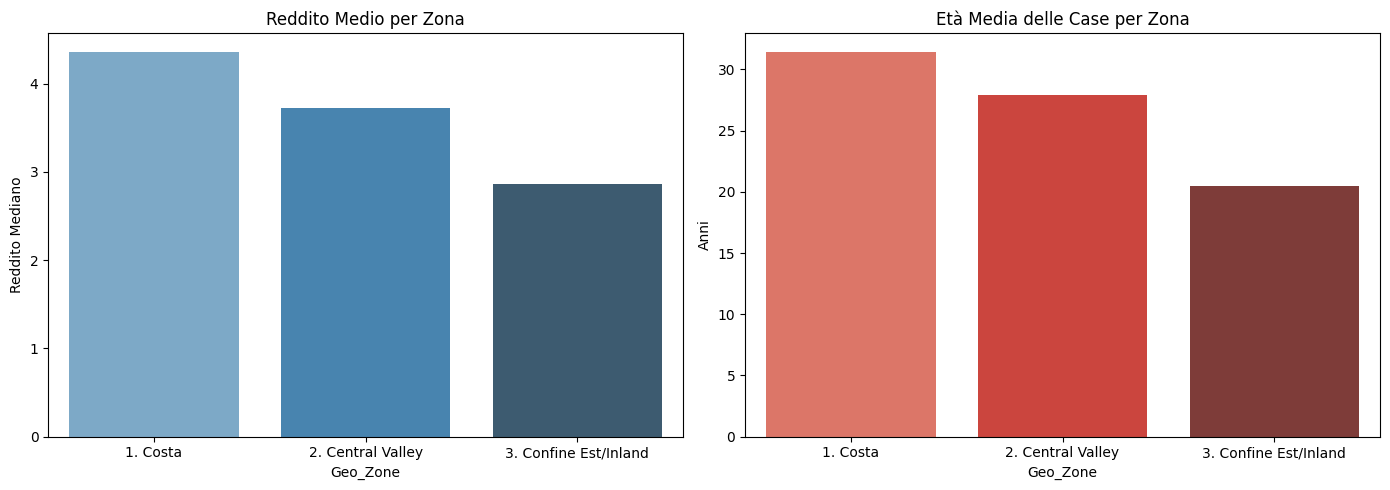

In [24]:
# Raggruppamento dati
geo_stats = df_geo.groupby('Geo_Zone')[['MedInc', 'HouseAge', 'AveRooms', 'Population']].mean()

print("\n--- Statistiche Medie per Zona ---")
print(geo_stats)

# Visualizzazione Reddito vs Età Casa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Reddito
sns.barplot(x=geo_stats.index, y=geo_stats['MedInc'], ax=axes[0], palette='Blues_d')
axes[0].set_title('Reddito Medio per Zona')
axes[0].set_ylabel('Reddito Mediano')

# Età Case
sns.barplot(x=geo_stats.index, y=geo_stats['HouseAge'], ax=axes[1], palette='Reds_d')
axes[1].set_title('Età Media delle Case per Zona')
axes[1].set_ylabel('Anni')

plt.tight_layout()
plt.show()

In [25]:
# Calcolo Prezzo per Stanza (Proxy del prezzo al metro quadro)
df_kpi['Price_per_Room'] = df_kpi['MedHouseVal'] / df_kpi['AveRooms']

# Confrontiamo le zone geografiche (Costa vs Valle) su questa metrica
plt.figure(figsize=(12, 6))
sns.barplot(x='Geo_Zone', y='Price_per_Room', data=df_kpi, palette='cool')
plt.title('Costo Reale dello Spazio: Prezzo per Stanza')
plt.ylabel('Prezzo per Stanza (Index)')
plt.show()

NameError: name 'df_kpi' is not defined

Sulla Costa, una singola stanza costa 3-4 volte quello che costa nell'Inland. Questo giustifica perché la gente fa i pendolari: ottengono il triplo dello spazio per lo stesso prezzo spostandosi all'interno.

Invece di guardare le medie (che appiattiscono tutto), isoliamo il Top 10% dei quartieri più ricchi e confrontiamolo con il resto. Questo risponde alla domanda: "Cosa rende speciale un quartiere d'élite?"


--- Confronto: Quartieri Elite (Top 10%) vs Altri ---
Is_Elite                   False        True 
MedInc                  3.550759     6.751428
HouseAge               28.179092    32.785264
AveRooms                5.317136     6.436316
Population           1450.826883  1197.202618
Affordability_Index     0.534775     0.837692


C:\Users\mbagn\AppData\Local\Temp\ipykernel_25020\1967274449.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Elite', y='HouseAge', data=df_kpi, palette='Set1')


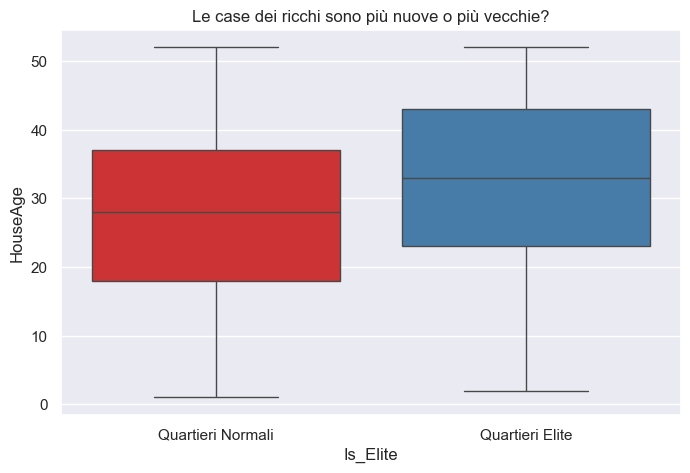

In [ ]:
# 1. Identifichiamo la soglia del top 10% per prezzo
threshold_top10 = df_kpi['MedHouseVal'].quantile(0.90)

# 2. Creiamo un flag "Elite District"
df_kpi['Is_Elite'] = df_kpi['MedHouseVal'] > threshold_top10

# 3. Confrontiamo le caratteristiche medie: Elite vs Normali
comparison = df_kpi.groupby('Is_Elite')[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Affordability_Index']].mean()

print("\n--- Confronto: Quartieri Elite (Top 10%) vs Altri ---")
print(comparison.T) # Trasposto per leggere meglio

# 4. Visualizziamo la differenza di età delle case
plt.figure(figsize=(8, 5))
sns.boxplot(x='Is_Elite', y='HouseAge', data=df_kpi, palette='Set1')
plt.title('Le case dei ricchi sono più nuove o più vecchie?')
plt.xticks([0, 1], ['Quartieri Normali', 'Quartieri Elite'])
plt.show()


## La correlazione però può essere anche non lineare

Colonne originali: 14
Colonne numeriche usate per l'analisi: 11

--- Classifica Importanza Features (Solo Numeriche) ---
                  Pearson (Lineare)  Spearman (Robusta)
MedInc                     0.688075            0.676778
Rooms_per_Person           0.209482            0.399798
Bedroom_Ratio              0.255624            0.331292
AveRooms                   0.151948            0.263367
AveOccup                   0.023737            0.256594
Latitude                   0.144160            0.165739
AveBedrms                  0.046701            0.125187
HouseAge                   0.105623            0.074855
Longitude                  0.045967            0.069667
Population                 0.024650            0.003839


<Figure size 1200x700 with 0 Axes>

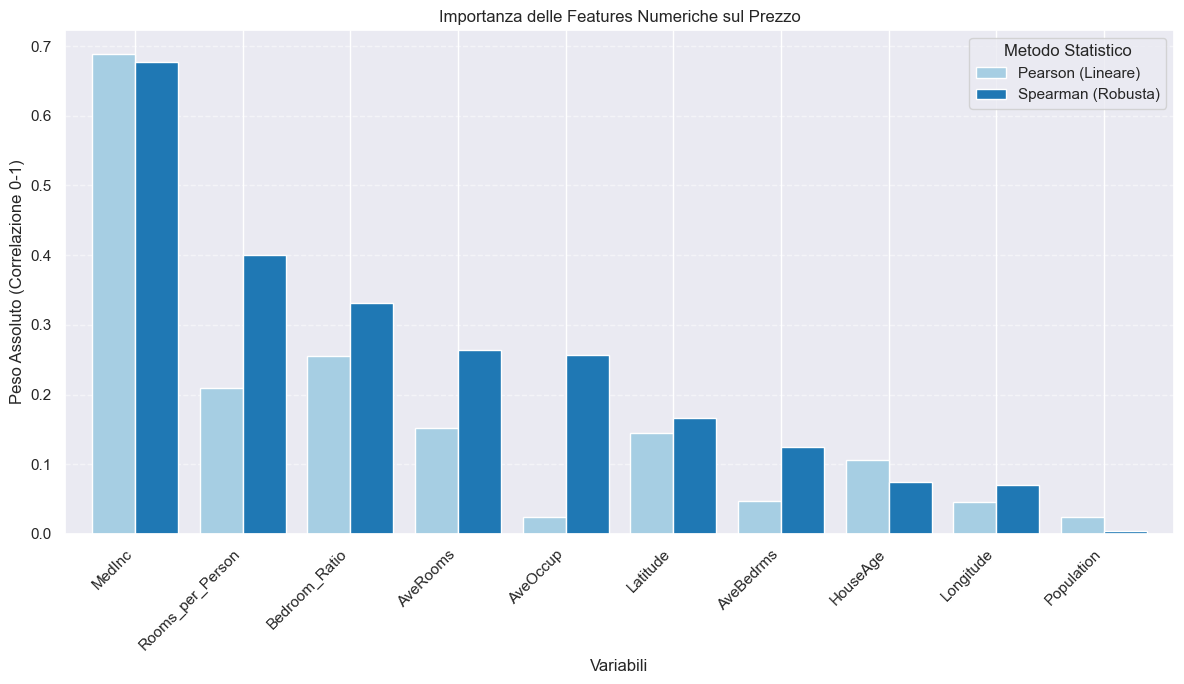

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che 'df' sia il tuo dataframe completo con le nuove feature categoriche
# 1. SELEZIONE: Teniamo solo le colonne numeriche (float e int)
df_numeric = df.select_dtypes(include='number')

print(f"Colonne originali: {df.shape[1]}")
print(f"Colonne numeriche usate per l'analisi: {df_numeric.shape[1]}")

# 2. CALCOLO CORRELAZIONI (PESI)
# Calcoliamo sia Pearson (Lineare) che Spearman (Robusta agli outlier)
# Usiamo .abs() perché ci interessa la forza della relazione, non la direzione
pearson_corr = df_numeric.corr(method='pearson')['MedHouseVal'].abs()
spearman_corr = df_numeric.corr(method='spearman')['MedHouseVal'].abs()

# 3. CREAZIONE DATAFRAME DI CONFRONTO
feature_weights = pd.DataFrame({
    'Pearson (Lineare)': pearson_corr,
    'Spearman (Robusta)': spearman_corr
})

# Rimuoviamo la riga del target stesso (che avrebbe correlazione 1.0)
feature_weights = feature_weights.drop('MedHouseVal', errors='ignore')

# Ordiniamo per importanza (usiamo Spearman che è più affidabile qui)
feature_weights = feature_weights.sort_values(by='Spearman (Robusta)', ascending=False)

print("\n--- Classifica Importanza Features (Solo Numeriche) ---")
print(feature_weights)

# 4. VISUALIZZAZIONE
plt.figure(figsize=(12, 7))

# Creiamo un bar plot affiancato
feature_weights.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#a6cee3', '#1f78b4'])

plt.title('Importanza delle Features Numeriche sul Prezzo')
plt.ylabel('Peso Assoluto (Correlazione 0-1)')
plt.xlabel('Variabili')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Metodo Statistico')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Interpretazione del "Delta" (Differenza)
Se Spearman > Pearson (di molto), siamo solitamente in uno di questi due casi:

1. Il Caso "Outlier Nocivi" 
Hai una buona relazione generale, ma pochi valori "pazzi" stanno rovinando la media e distruggendo la correlazione lineare (Pearson). Spearman, che guarda la classifica, ignora quei valori pazzi e vede la relazione vera.

Esempio in questo dataset: AveRooms. La maggior parte delle case ha 4-6 stanze e il prezzo sale col numero di stanze. Ma c'è quella casa da 140 stanze che fa crollare la correlazione lineare.

2. Il Caso "Relazione Curva" (Non lineare)
La relazione è forte, ma non è una linea retta (es. è esponenziale o logaritmica).

## proviamo a rimuovere gli outliers

Righe Originali: 20640
Righe Pulite:    16842
Dati persi:      3798 (18.4%)

--- Classifica Importanza Features (Senza Outliers) ---
                  Pearson (Lineare)  Spearman (Robusta)
MedInc                     0.629493            0.654354
Rooms_per_Person           0.442258            0.419449
AveOccup                   0.322755            0.288715
Bedroom_Ratio              0.190132            0.266129
AveRooms                   0.255535            0.246328
Latitude                   0.147058            0.164930
HouseAge                   0.126655            0.089804
AveBedrms                  0.058951            0.089593
Longitude                  0.041298            0.069807
Population                 0.037291            0.012970


<Figure size 1200x700 with 0 Axes>

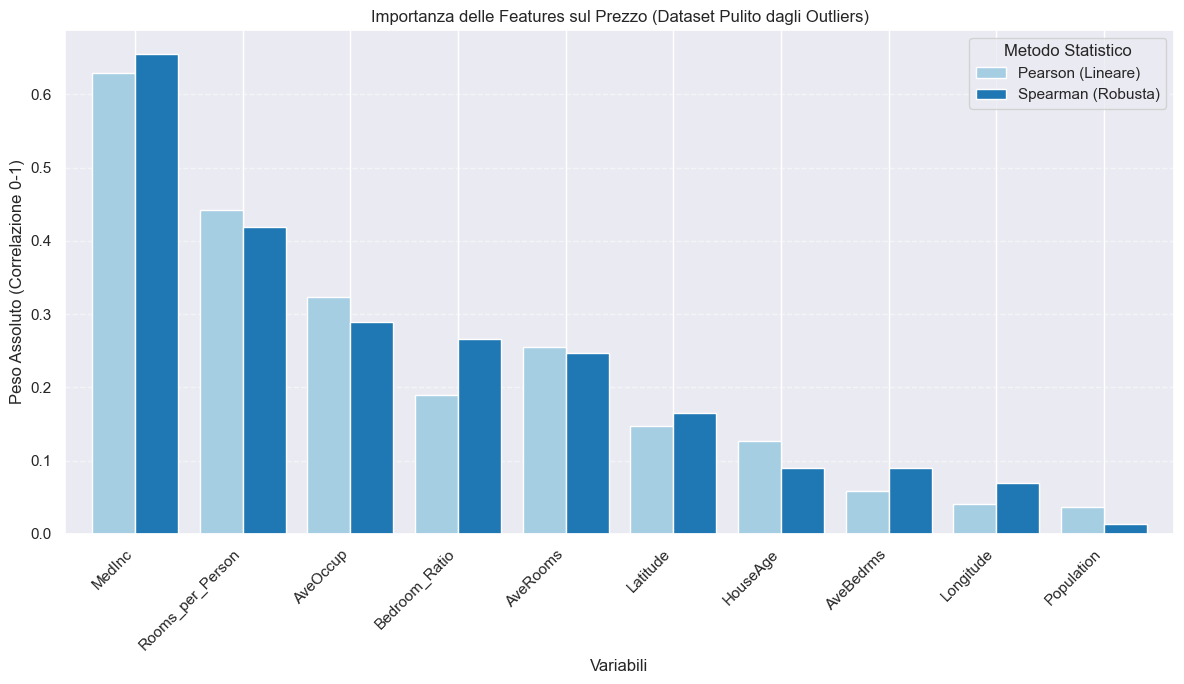

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponiamo che 'df' sia il tuo dataframe originale
# Definiamo le colonne su cui ha senso rimuovere gli outlier (non Latitude/Longitude)
cols_to_clean = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# --- STEP 1: RIMOZIONE OUTLIERS (Metodo IQR) ---
Q1 = df[cols_to_clean].quantile(0.25)
Q3 = df[cols_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Definiamo i limiti
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtriamo: teniamo solo le righe che NON sono outlier in nessuna delle colonne selezionate
condition = ~((df[cols_to_clean] < lower_bound) | (df[cols_to_clean] > upper_bound)).any(axis=1)
df_clean = df[condition]

# Report della pulizia
print(f"Righe Originali: {len(df)}")
print(f"Righe Pulite:    {len(df_clean)}")
print(f"Dati persi:      {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")


# --- STEP 2: SELEZIONE E CALCOLO CORRELAZIONI ---
# Usiamo df_clean ora!
df_numeric = df_clean.select_dtypes(include='number')

# Calcoliamo le correlazioni
pearson_corr = df_numeric.corr(method='pearson')['MedHouseVal'].abs()
spearman_corr = df_numeric.corr(method='spearman')['MedHouseVal'].abs()


# --- STEP 3: CREAZIONE DATAFRAME DI CONFRONTO ---
feature_weights = pd.DataFrame({
    'Pearson (Lineare)': pearson_corr,
    'Spearman (Robusta)': spearman_corr
})

# Rimuoviamo il target
feature_weights = feature_weights.drop('MedHouseVal', errors='ignore')

# Ordiniamo per Spearman
feature_weights = feature_weights.sort_values(by='Spearman (Robusta)', ascending=False)

print("\n--- Classifica Importanza Features (Senza Outliers) ---")
print(feature_weights)


# --- STEP 4: VISUALIZZAZIONE ---
plt.figure(figsize=(12, 7))

feature_weights.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#a6cee3', '#1f78b4'])

plt.title('Importanza delle Features sul Prezzo (Dataset Pulito dagli Outliers)')
plt.ylabel('Peso Assoluto (Correlazione 0-1)')
plt.xlabel('Variabili')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Metodo Statistico')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

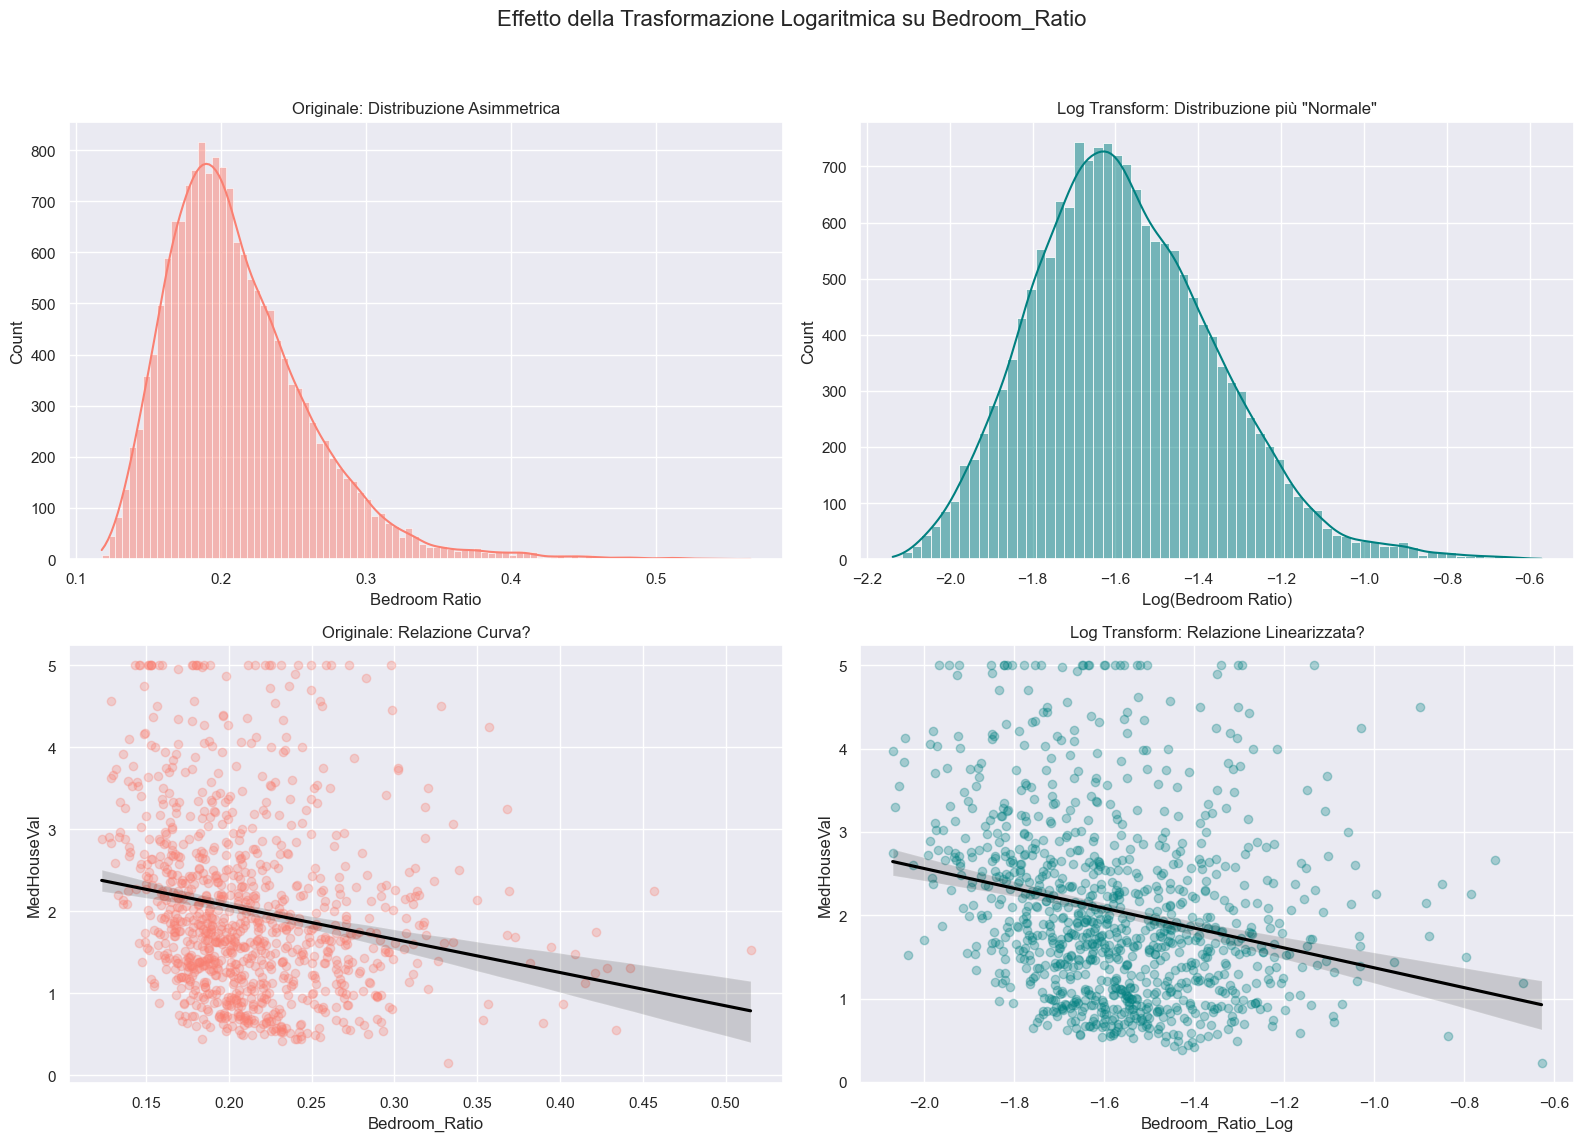

--- Guadagno di Linearità (Correlazione Pearson) ---
Originale: -0.1901
Logaritmo: -0.2311
Miglioramento: 0.0409


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Usiamo il dataframe pulito (df_clean) dallo step precedente per evitare che gli outlier rovinino il test
# Se non hai df_clean in memoria, usa df, ma i risultati saranno meno puliti.
dataset_test = df_clean.copy() 

# 1. Creiamo la variabile originale
dataset_test['Bedroom_Ratio'] = dataset_test['AveBedrms'] / dataset_test['AveRooms']

# 2. Applichiamo la trasformazione Logaritmica
# Usiamo np.log() (logaritmo naturale). 
# Poiché è un rapporto, non ci aspettiamo zeri, ma per sicurezza matematica a volte si usa np.log1p (log(1+x))
# Qui usiamo log puro perché il ratio è sempre > 0.
dataset_test['Bedroom_Ratio_Log'] = np.log(dataset_test['Bedroom_Ratio'])

# --- VISUALIZZAZIONE DEL CONFRONTO ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Effetto della Trasformazione Logaritmica su Bedroom_Ratio', fontsize=16)

# A. ISTOGRAMMA (Distribuzione)
# Prima
sns.histplot(dataset_test['Bedroom_Ratio'], kde=True, ax=axes[0, 0], color='salmon')
axes[0, 0].set_title('Originale: Distribuzione Asimmetrica')
axes[0, 0].set_xlabel('Bedroom Ratio')

# Dopo
sns.histplot(dataset_test['Bedroom_Ratio_Log'], kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Log Transform: Distribuzione più "Normale"')
axes[0, 1].set_xlabel('Log(Bedroom Ratio)')

# B. SCATTERPLOT vs PREZZO (Relazione)
# Prima
sns.regplot(x='Bedroom_Ratio', y='MedHouseVal', data=dataset_test.sample(1000), 
            ax=axes[1, 0], scatter_kws={'alpha':0.3, 'color':'salmon'}, line_kws={'color':'black'})
axes[1, 0].set_title('Originale: Relazione Curva?')

# Dopo
sns.regplot(x='Bedroom_Ratio_Log', y='MedHouseVal', data=dataset_test.sample(1000), 
            ax=axes[1, 1], scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'black'})
axes[1, 1].set_title('Log Transform: Relazione Linearizzata?')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- VERIFICA NUMERICA (Pearson) ---
corr_old = dataset_test[['Bedroom_Ratio', 'MedHouseVal']].corr().iloc[0, 1]
corr_new = dataset_test[['Bedroom_Ratio_Log', 'MedHouseVal']].corr().iloc[0, 1]

print(f"--- Guadagno di Linearità (Correlazione Pearson) ---")
print(f"Originale: {corr_old:.4f}")
print(f"Logaritmo: {corr_new:.4f}")
print(f"Miglioramento: {abs(corr_new) - abs(corr_old):.4f}")


### 1\. Il Concetto Intuitivo: "L'Equalizzatore"

Immagina di avere una molla tirata tantissimo da una parte sola (asimmetria). La trasformazione logaritmica serve a "rilasciare" quella tensione, riportando i dati a una forma più compatta ed equilibrata.

Matematicamente, il logaritmo riduce drasticamente i valori molto grandi, mentre lascia quasi invariati i valori piccoli.

  * **Log(10) = 1**
  * **Log(100) = 2**
  * **Log(1000) = 3**

**La magia:** La distanza tra 100 e 1000 (che è enorme: 900 unità) diventa uguale alla distanza tra 10 e 100 (che è piccola: 90 unità). Il logaritmo ci fa ragionare per **ordini di grandezza** anziché per somme.

-----

### 2\. Perché la usiamo? (L'Obiettivo Statistico)

La maggior parte degli algoritmi classici (Correlazione di Pearson, Regressione Lineare) e test statistici "sognano" un mondo perfetto dove i dati seguono una **Distribuzione Normale** (la famosa curva a campana o Gaussiana).

[Image of histogram distribution normal vs skewed]

Tuttavia, i dati reali (prezzi case, stipendi, popolazione) hanno quasi sempre una **"Coda Lunga a Destra"** (Right Skewed):

  * C'è una massa di valori bassi/medi.
  * C'è una coda sottile di valori enormi (i ricchi, le metropoli).

Se usi i dati così come sono, il modello verrà "attratto" dai valori enormi e sbaglierà le previsioni sulla massa dei dati normali. Il logaritmo "schiaccia" quella coda destra e la riporta al centro, rendendo la distribuzione simmetrica.

-----

### 3\. Checklist: Quando applicarla?

Dovresti considerare il logaritmo quando noti uno di questi 3 segnali:

1.  **Asimmetria Positiva (Right Skewness):**

      * Fai un istogramma. Se assomiglia a uno scivolo che scende verso destra (tanti valori bassi, pochi altissimi), applica il log.
      * *Esempi:* `MedInc` (Reddito), `Population`, `AveRooms`.

2.  **Relazioni Esponenziali:**

      * Fai uno scatterplot. Se i punti formano una curva che sale sempre più velocemente (non una retta), il logaritmo può "raddrizzare" quella curva in una linea retta, rendendo la correlazione lineare (Pearson) molto più forte.

3.  **Varianza che cresce (Eteroschedasticità):**

      * Se noti che per valori bassi i punti sono vicini, ma per valori alti i punti si "sparpagliano" molto (a forma di cono), il logaritmo stabilizza questa varianza.

-----

### 4\. La Regola del "Non Zero" (Attenzione\!)

Il logaritmo di zero ($\log(0)$) è **meno infinito**. Il logaritmo di un numero negativo non esiste (nei reali).

**Come risolvere?**
Se i tuoi dati contengono zeri (es. "Numero di bagni" potrebbe essere 0 in un monolocale, anche se raro), non usare `np.log()`.
Usa invece:
$$y = \log(x + 1)$$
In Python (NumPy) esiste una funzione apposita e sicura:

```python
# Trasformazione sicura anche se ci sono zeri
df['Feature_Log'] = np.log1p(df['Feature'])
```

### Nel nostro caso (`Bedroom_Ratio`)

Il rapporto camere/stanze era asimmetrico (tante case hanno un rapporto basso, poche hanno un rapporto altissimo). Applicando il log, hai distribuito meglio questi dati, permettendo alla correlazione di Pearson di "vedere" meglio la relazione con il prezzo.

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Bedroom_Ratio,Rooms_per_Person,Income_Bin,Age_Group
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,2.732919,Alto,Storiche (>40)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,2.956685,Alto,Medie (20-30)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,2.957661,Alto,Storiche (>40)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,2.283154,Alto,Storiche (>40)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,2.879646,Medio-Alto,Storiche (>40)


In [28]:
df_model = df.copy()

X = df_model.drop("MedHouseVal", axis=1)
y = df_model["MedHouseVal"].values


In [31]:
categorical_cols = ["Income_Bin", "Age_Group"]
numerical_cols = X.columns.drop(categorical_cols)


In [32]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True   # evita multicollinearità
)


In [43]:
X_encoded.head()
df_model = pd.get_dummies(
    df,
    columns=["Income_Bin", "Age_Group"],
    drop_first=True
)



In [44]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"].values


In [51]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)


In [52]:
from sklearn.preprocessing import StandardScaler

numerical_cols = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude",
    "Bedroom_Ratio", "Rooms_per_Person"
]

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])
X_test[numerical_cols]  = scaler.transform(X_test[numerical_cols])


In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),

    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(1)
])


c:\Users\39327\OneDrive\Documenti\GitHub\Brescia_DepositoCorso\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)
print(df_model.dtypes)



MedInc                       float64
HouseAge                     float64
AveRooms                     float64
AveBedrms                    float64
Population                   float64
AveOccup                     float64
Latitude                     float64
Longitude                    float64
MedHouseVal                  float64
Bedroom_Ratio                float64
Rooms_per_Person             float64
Income_Bin_Medio-Basso          bool
Income_Bin_Medio-Alto           bool
Income_Bin_Alto                 bool
Age_Group_Recenti (10-20)       bool
Age_Group_Medie (20-30)         bool
Age_Group_Vecchie (30-40)       bool
Age_Group_Storiche (>40)        bool
dtype: object


In [55]:
X = df_model.drop("MedHouseVal", axis=1)
y = df_model["MedHouseVal"].values


In [56]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)


In [57]:
from sklearn.preprocessing import StandardScaler

numerical_cols = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude",
    "Bedroom_Ratio", "Rooms_per_Person"
]

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])
X_test[numerical_cols]  = scaler.transform(X_test[numerical_cols])


In [58]:
X_train = X_train.astype("float32").values
X_valid = X_valid.astype("float32").values
X_test  = X_test.astype("float32").values


In [63]:
print(X_train.dtype)   # deve stampare: float32
print(X_train.shape)


float32
(13209, 17)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),

    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),

    layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse",
    metrics=["mae"]
)


Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 12, but received input with shape (None, 17)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 17), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
mse_test, mae_test = model.evaluate(X_test, y_test)
print(f"MAE sul Test Set: {mae_test:.3f}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("Epoche")
plt.ylabel("MSE")
plt.title("Training vs Validation Loss")
plt.show()
